In [ ]:
from guacamol.distribution_matching_generator import DistributionMatchingGenerator
from guacamol_baselines.random_smiles_sampler.distribution_learning import RandomSmilesSampler 
from guacamol.assess_distribution_learning import assess_distribution_learning
import numpy as np
from rdkit import Chem

Using TensorFlow backend.


In [ ]:
class TrickySampler(DistributionMatchingGenerator):
    def __init__(self, smi_file):
        self.smi_file = smi_file
        with open(smi_file) as f:
            self.train_list = np.array(f.read().split())
        
        self.train_set = set(self.train_list)
        self.train_size = self.train_list.shape[0]
    
    def generate(self, number_samples):
        smiles = set()
        
        total = 0
        while len(smiles) < number_samples:
            idx = np.random.choice(self.train_size)
            mol =  Chem.MolFromSmiles(self.train_list[idx])
            cansmi = Chem.MolToSmiles(mol)
            
            maxcount = 0
            max_smiles = None
            for i in np.arange(len(cansmi)):
                mut = cansmi[:i] + 'C' + cansmi[i:]
                mutmol = Chem.MolFromSmiles(mut)
                if mutmol is None:
                    continue
                    
                mutcan = Chem.MolToSmiles(mutmol)
                mutcut = mut[:i] + mut[i+1:]
                simcount = sum(1 for x,y in zip(mutcut, cansmi) if x==y)
                sim = simcount / len(mutcut)
                
                if (simcount > maxcount) and not (mut in self.train_set):
                    maxcount  = simcount
                    maxsim = sim
                    max_smiles = mutcan
                    maxcut = mutcut
                    if maxcount == len(mutcut):
                        break
                        
                
#             print(maxsim)
#             print(max_smiles)
#             print(cansmi)
#             print(maxcut)
#             print()

            if max_smiles is not None:
                smiles.add(max_smiles)
                

            total += 1
            if total % 100 == 0:
                print(len(smiles)/total,total,  ' '*50, end='\r')
        return list(smiles)

    
smi_train = './data/guacamol_v1_train.smiles'
smi_test = './data/guacamol_v1_test.smiles'

tricky_sampler =  TrickySampler(smi_train)
random_sampler = RandomSmilesSampler(tricky_sampler.train_list)

In [ ]:
sampled = tricky_sampler.generate(10000)
sampled_file = './distribution_results/tricky_smiles.txt'
with open(sampled_file, 'w') as f:
    for s in sampled:
        print(s, file=f)
sampled

O=C(c1ccc(N2CCN(C(=O)c3ccc(F)c(F)c3)CC2)cc1)c1cccc(F)c1
O=C(c1ccc(F)c(F)c1)N1CCN(c2ccc(C(=CO)c3cccc(F)c3)cc2)CC1

O=C(c1cccc(C(F)(F)c2n[nH]c(=O)c3c2CCCC3)c1)N1CCn2c(nnc2C(F)(F)F)C1
O=c1[nH]nc(C(F)(F)c2cccc(C(=CO)N3CCn4c(nnc4C(F)(F)F)C3)c2)c2c1CCCC2

O=C(CCCCC1SCC2NC(=O)NC21)NCCOCCOCCOCCNC(=O)OC1Cc2ccccc2C#Cc2ccccc21
O=C1NC2CSC(CCCCC(=CO)NCCOCCOCCOCCNC(=O)OC3Cc4ccccc4C#Cc4ccccc43)C2N1

O=C(COc1ccc2c(c1)CN(C(=O)CCc1ccccc1)C(C(=O)NCCc1ccccc1)C2)NO
O=C(NCCc1ccccc1)C1Cc2ccc(OCC(=CO)NO)cc2CN1C(=O)CCc1ccccc1

O=C(NC1CCCCC1)C(c1ccc(C(F)(F)F)cc1)n1c(=O)c(-c2ccco2)nc2ccccc21
O=c1c(-c2ccco2)nc2ccccc2n1C(C(=CO)NC1CCCCC1)c1ccc(C(F)(F)F)cc1

O=C(c1ccc(C[S+]([O-])Cc2ccc(Cl)cc2)o1)N1CCN(C2CCCCC2)CC1
[O-][S+](Cc1ccc(Cl)cc1)Cc1ccc(C(=CO)N2CCN(C3CCCCC3)CC2)o1

O=c1[nH]c(=O)n(C2CC(F)C(COP(=O)(O)O)O2)cc1F
O=C1NC(=CO)C(F)=CN1C1CC(F)C(COP(=O)(O)O)O1

Cc1[nH]c2ncc(Cl)cc2c1C1=NCCN1
CC1=C(C2=NCCN2)c2cc(Cl)cnc2NC1

O=C(O)c1cn(Cc2ccc(-c3ccccc3)cc2)c2c(c1=O)CCCC2            
O=c1c(C(O)=CO)cn(Cc2ccc(-c3ccccc3)cc2)c

O=C(NC1=NCCS1)c1cccc(NC(=O)c2ccco2)c1                                     
O=C(Nc1cccc(C(=CO)NC2=NCCS2)c1)c1ccco1

O=C(c1cccc(S(=O)(=O)Nc2ccc(F)cc2)c1)N1CCOCC1
O=S(=O)(Nc1ccc(F)cc1)c1cccc(C(=CO)N2CCOCC2)c1

O=C(NCc1ccco1)c1cccn2c(=O)c3c4c(sc3nc12)CCCC4
O=c1c2c3c(sc2nc2c(C(=CO)NCc4ccco4)cccn12)CCCC3

O=C(C=CC(=O)N1CC(=Cc2ccccc2)C(=O)C(=Cc2ccccc2)C1)Nc1ccc(Cl)cc1
O=C1C(=Cc2ccccc2)CN(C(=O)C=CC(=CO)Nc2ccc(Cl)cc2)CC1=Cc1ccccc1

O=c1nc(OCC2COCCO2)cc2n1CCc1cc(C#CCCO)ccc1-2                               
OC=C1N=C(OCC2COCCO2)C=C2c3ccc(C#CCCO)cc3CCN12

O=C(NN=Cc1ccc(-c2ccc([N+](=O)[O-])cc2)o1)C(O)c1ccccc1
O=[N+]([O-])c1ccc(-c2ccc(C=NNC(=CO)C(O)c3ccccc3)o2)cc1

O=C(COc1ccc(CNCC2OC(n3ccc(=O)[nH]c3=O)C(O)C2O)cc1)Nc1ccccn1
O=c1ccn(C2OC(CNCc3ccc(OCC(=CO)Nc4ccccn4)cc3)C(O)C2O)c(=O)[nH]1

O=C(O)CCC(=O)N1CCCC1C(=O)O
O=C(O)C1CCCN1C(=O)CCC(O)=CO

O=C(Nc1ccc(F)c(F)c1)NC1(C(=O)NC(Cc2ccccc2)C(=O)NCCCN2CCOCC2)CCCC1
O=C(NCCCN1CCOCC1)C(Cc1ccccc1)NC(=O)C1(NC(=CO)Nc2ccc(F)c(F)c2)CCCC1

O=C(CSc1nnc(CNC(=O)c2ccccc2

O=C(CS(=O)(=O)Cc1ccccc1)Nc1ccc(Cl)cn1
O=S(=O)(CC(=CO)Nc1ccc(Cl)cn1)Cc1ccccc1

O=C(CBr)c1ccc([N+](=O)[O-])c(CS(=O)(=O)c2ccc(Cl)cc2)c1
O=[N+]([O-])c1ccc(C(=CO)CBr)cc1CS(=O)(=O)c1ccc(Cl)cc1

O=C(O)c1cn(C2CC2)c2cc(N3CCN(C(=O)c4cccnc4Cl)CC3)c(F)cc2c1=O
O=C(c1cccnc1Cl)N1CCN(c2cc3c(cc2F)c(=O)c(C(O)=CO)cn3C2CC2)CC1

O=C(CSc1ccc(C(=O)Nc2ccc(F)cc2)cn1)c1ccc(Cl)c([N+](=O)[O-])c1
O=C(Nc1ccc(F)cc1)c1ccc(SCC(=CO)c2ccc(Cl)c([N+](=O)[O-])c2)nc1

Cc1c(NC2CCCNC2)nc2ccnn2c1Nc1ccc(F)c(Cl)c1
CC1=C(Nc2ccc(F)c(Cl)c2)n2nccc2N=C(NC2CCCNC2)C1

O=C1Nc2ccc(CN3C(=O)CSC3=O)cc2C1=Cc1cc(CN2CCOCC2)c[nH]1
O=C1CSC(=O)N1Cc1ccc2[nH]c(=CO)c(=Cc3cc(CN4CCOCC4)c[nH]3)c2c1

O=C(NCc1ccc(F)cc1)c1ccc(C[S+]([O-])Cc2ccc(Cl)cc2)o1
[O-][S+](Cc1ccc(Cl)cc1)Cc1ccc(C(=CO)NCc2ccc(F)cc2)o1

O=C(CN1C(=O)NC(=Cc2ccccc2OCc2ccc(C(=O)O)cc2)C1=O)Nc1ccccc1F
O=C(O)c1ccc(COc2ccccc2C=C2NC(=O)N(CC(=CO)Nc3ccccc3F)C2=O)cc1

O=Cc1cc([N+](=O)[O-])no1                                                  
O=[N+]([O-])c1cc(C=CO)on1

O=C(CCc1c[nH]c2ccccc12)NC(Cc1

O=C(CNC1CCN(S(=O)(=O)Cc2ccccc2)C1)N1CCN(Cc2cccc(C(F)(F)F)c2)CC1
O=S(=O)(Cc1ccccc1)N1CCC(NCC(=CO)N2CCN(Cc3cccc(C(F)(F)F)c3)CC2)C1

O=C(C=Cc1ccc(F)cc1)Nc1ccc(-c2nc3ccc([N+](=O)[O-])cc3n2O)cc1
O=[N+]([O-])c1ccc2nc(-c3ccc(NC(C=Cc4ccc(F)cc4)=CO)cc3)n(O)c2c1

O=C(CS(=O)(=O)c1nc(-c2ccc(Cl)cc2)cn1-c1ccccc1)Nc1ccc(F)cc1F               
O=S(=O)(CC(=CO)Nc1ccc(F)cc1F)c1nc(-c2ccc(Cl)cc2)cn1-c1ccccc1

O=C(C1CCS(=O)(=O)CC1)N1CCN(c2ncc(C3CC3)cn2)CC1c1cccc(F)c1
O=S1(=O)CCC(C(=CO)N2CCN(c3ncc(C4CC4)cn3)CC2c2cccc(F)c2)CC1

O=C(Cn1c(=O)c2cccn2c2ccc(F)cc21)N1CCN(c2ccccc2)CC1
O=c1c2cccn2c2ccc(F)cc2n1CC(=CO)N1CCN(c2ccccc2)CC1

C#CCOc1ccc(CCNC(=O)C(OCC#C)c2ccc(CC)cc2)cc1OC
C#CCOC(C(=O)NCCc1ccc(OCC#CC)c(OC)c1)c1ccc(CC)cc1

CCc1nc(C)nc2c1CCC(=O)N2Cc1ccc(-c2ccccc2-c2nn[nH]n2)cc1
CCC1=C2CCC(=O)N(Cc3ccc(-c4ccccc4-c4nn[nH]n4)cc3)C2=NC(C)=NC1

O=c1[nH]c(=NOCCCc2ccc(I)cc2)ccn1C1OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C(O)C1O
O=P(O)(O)OP(=O)(O)OP(=O)(O)OCC1OC(N2C=CC(=NOCCCc3ccc(I)cc3)NC2=CO)C(O)C1O

O=C(O)CC(NC(=O)CCC(=O)Nc1c

O=[N+]([O-])c1ccccc1S(=O)(=O)Nc1ccc(-c2nc3ccccc3[nH]2)cc1
O=S(=O)(Nc1ccc(-c2nc3ccccc3[nH]2)cc1)c1ccccc1[N+]([O-])=CO

O=c1[nH]c2c(cnn2-c2ccc(Cl)cc2)c(=O)n1-c1cccc(Cl)c1
O=C1c2cnn(-c3ccc(Cl)cc3)c2NC(=CO)N1c1cccc(Cl)c1

O=C1Nc2ccc(-n3cccn3)cc2C(CNC(=O)c2ccc(F)cc2)(C(F)(F)F)O1                  
O=C(NCC1(C(F)(F)F)OC(=CO)Nc2ccc(-n3cccn3)cc21)c1ccc(F)cc1

O=C(COC(=O)C1CCC1)Nc1cc(S(=O)(=O)N2CCOCC2)ccc1Cl
O=C(OCC(=CO)Nc1cc(S(=O)(=O)N2CCOCC2)ccc1Cl)C1CCC1

O=C(CSc1nnc(-c2ccccc2)o1)NC(=O)Cc1ccccc1
O=C(Cc1ccccc1)NC(=CO)CSc1nnc(-c2ccccc2)o1

O=C(CCN1C(=O)C(=Cc2ccc(F)cc2)SC1=S)Nc1cc([N+](=O)[O-])ccc1O
O=C1C(=Cc2ccc(F)cc2)SC(=S)N1CCC(=CO)Nc1cc([N+](=O)[O-])ccc1O

O=C(CCCCCn1c(=O)[nH]c2ccccc2c1=O)NCc1cccc(Cl)c1
O=c1[nH]c2ccccc2c(=O)n1CCCCCC(=CO)NCc1cccc(Cl)c1

O=C(CC[N+](=O)[O-])Nc1ccc(Cl)cc1
O=[N+]([O-])CCC(=CO)Nc1ccc(Cl)cc1

O=C(COC(=O)c1ccccc1)Nc1cc(Cl)ccc1Oc1ccccc1
O=C(OCC(=CO)Nc1cc(Cl)ccc1Oc1ccccc1)c1ccccc1

O=C(COc1cccc2ccc(=O)[nH]c12)Nc1ccc(F)cc1
O=c1ccc2cccc(OCC(=CO)Nc3ccc(F)cc3)c2[nH]1

O=C(

O=C(NC1CC[N+]([O-])(CCCCC2(C(=O)NCC(F)(F)F)c3ccccc3-c3ccccc32)CC1)c1ccccc1-c1ccc(C(F)(F)F)cc1
O=C(NCC(F)(F)F)C1(CCCC[N+]2([O-])CCC(NC(=CO)c3ccccc3-c3ccc(C(F)(F)F)cc3)CC2)c2ccccc2-c2ccccc21

O=C(O)CN(Cc1ccccn1)C(=O)c1ccc(-c2ccccc2)o1
O=C(c1ccc(-c2ccccc2)o1)N(CC(O)=CO)Cc1ccccn1

O=C(Cc1n[nH]c(=O)c2ccccc12)NCC(c1ccccc1Cl)N1CCCC1
O=c1[nH]nc(CC(=CO)NCC(c2ccccc2Cl)N2CCCC2)c2ccccc12

O=C(Nc1cnn(-c2cccc(C(=O)Nc3cnn(C4CCNC4)c3)c2)c1)Nc1ccccc1Cl
O=C(Nc1cnn(C2CCNC2)c1)c1cccc(-n2cc(NC(=CO)Nc3ccccc3Cl)cn2)c1

O=C(CCNC(=O)c1ccoc1)Nc1c(F)cccc1F
O=C(NCCC(=CO)Nc1c(F)cccc1F)c1ccoc1

O=c1cc(N2CCOCC2)oc2c(-c3cccc(-c4ccc(CO)cc4)c3)cccc12
OC=C1C=C(N2CCOCC2)Oc2c1cccc2-c1cccc(-c2ccc(CO)cc2)c1

O=c1[nH]cnc2c1C(c1ccccc1)c1ccc3cccnc3c1O2
OC=C1NC=NC2=C1C(c1ccccc1)c1ccc3cccnc3c1O2

O=C(Nc1ccc(Cn2ncc(N3CCCNCC3)c(Cl)c2=O)cc1)Nc1ccc(C(F)(F)F)cc1
O=c1c(Cl)c(N2CCCNCC2)cnn1Cc1ccc(NC(=CO)Nc2ccc(C(F)(F)F)cc2)cc1

O=C(Nc1ccc2oc(Cc3ccc(Cl)cc3)nc2c1)c1ccc([N+](=O)[O-])cc1
O=[N+]([O-])c1ccc(C(=CO)Nc2ccc3oc(Cc4ccc(Cl)cc4)nc3c2

O=C(Nc1cc(Cl)cc(Cl)c1)c1ccc(F)c(S(=O)(=O)NC2CCCC2)c1
O=S(=O)(NC1CCCC1)c1cc(C(=CO)Nc2cc(Cl)cc(Cl)c2)ccc1F

O=C(Nc1ccccc1)Nc1cccc2c1C1CCCCN1C2=O
O=C1c2cccc(NC(=CO)Nc3ccccc3)c2C2CCCCN12

O=C(c1ccc(-c2ccccc2)cc1)n1c2c(c3cc(S(=O)(=O)O)ccc31)CSCC2
O=S(=O)(O)c1ccc2c(c1)c1c(n2C(=CO)c2ccc(-c3ccccc3)cc2)CCSC1

O=C(Nc1ccc2nc(SCC(=O)N3CCc4ccccc43)sc2c1)c1ccc(F)cc1                     
O=C(CSc1nc2ccc(NC(=CO)c3ccc(F)cc3)cc2s1)N1CCc2ccccc21

O=C(O)c1cc(CN2CCC(c3ccccc3F)CC2)c2ccccn2c1=O
O=c1c(C(O)=CO)cc(CN2CCC(c3ccccc3F)CC2)c2ccccn12

O=C(NCc1ccco1)C(c1ccc(F)cc1)N(C(=O)Cc1cccs1)c1cccnc1
O=C(Cc1cccs1)N(c1cccnc1)C(C(=CO)NCc1ccco1)c1ccc(F)cc1

CCC12CCCC3C(N)Cc4c(n(c5cc(O)c(O)cc45)C(=O)C1)C32                          
CCC1CC(=O)n2c3c(c4cc(O)c(O)cc42)CC(N)C2CCCC1C32

Oc1cccc(Br)c1
OC1=CC(Br)=CC=CC1

O=C(O)c1cccc(Cn2ccc3cc(-c4ccc5ccn(Cc6cccc(C(=O)O)c6)c5c4)ccc32)c1
O=C(O)c1cccc(Cn2ccc3ccc(-c4ccc5c(ccn5Cc5cccc(C(O)=CO)c5)c4)cc32)c1

O=C(OC1CCNC(C(=O)O)C1)c1cc(Br)c[nH]1
O=C(O)C1CC(OC(=CO)c2cc(Br)c[nH]2)CCN1



O=C(NCc1ccc(S(=O)(=O)N2CCCCC2)cc1)c1cnc2nccn2c1
O=S(=O)(c1ccc(CNC(=CO)c2cnc3nccn3c2)cc1)N1CCCCC1

O=C(O)Cn1c(=NC(=O)c2ccccc2)sn(Cc2ccccc2)c1=O
O=C(N=c1sn(Cc2ccccc2)c(=O)n1CC(O)=CO)c1ccccc1

O=C(CSc1nc2cc([N+](=O)[O-])ccc2[nH]1)c1ccc(O)c(O)c1
O=[N+]([O-])c1ccc2[nH]c(SCC(=CO)c3ccc(O)c(O)c3)nc2c1

O=C(O)c1cc(CCCCP(=O)(O)O)ccn1                                             
O=P(O)(O)CCCCc1ccnc(C(O)=CO)c1

O=C(Nc1ccc(Oc2cccc(C(=O)Nc3cccnc3)c2)cc1)Nc1ccc(Cl)c(C(F)(F)F)c1
O=C(Nc1cccnc1)c1cccc(Oc2ccc(NC(=CO)Nc3ccc(Cl)c(C(F)(F)F)c3)cc2)c1

O=C(CS(=O)(=O)c1cn(Cc2ccc(Cl)cc2)c2ccccc12)N1CCCCC1
O=S(=O)(CC(=CO)N1CCCCC1)c1cn(Cc2ccc(Cl)cc2)c2ccccc12

O=[N+]([O-])c1ccc(CCN2CCN(c3ccc([N+](=O)[O-])s3)CC2)cc1
O=[N+]([O-])c1ccc(N2CCN(CCc3ccc([N+]([O-])=CO)cc3)CC2)s1

O=[N+]([O-])c1cc(O)c2c(c1)S(=O)(=O)N=C(Nc1ccccc1Cl)N2
O=S1(=O)N=C(Nc2ccccc2Cl)Nc2c(O)cc([N+]([O-])=CO)cc21

O=C(Nc1ccc(S(=O)(=O)Nc2ncccn2)cc1)c1nn(Cc2ccccc2)c(=O)c2ccccc12
O=c1c2ccccc2c(C(=CO)Nc2ccc(S(=O)(=O)Nc3ncccn3)cc2)nn1Cc1ccccc1

O=C(O)c1c

['CCOc1cccc2oc(-c3ccc(F)cc3)cc(=O)c12',
 'CCC(C)N(Cc1cnn(C)c1)Cc1nc(Cc2ccccc2Cl)no1',
 'CCCOC(=O)CSc1cc[nH]c(=O)n1',
 'CCCOC(=O)C(Cc1ccc(O)c([N+](=O)[O-])c1)N1C(=O)c2ccccc2C1=O',
 'CCCOc1cc(C(=O)O)ccc1OCCOc1ccccc1',
 'CCS(=O)(=O)c1ccc(C(=O)Nc2ccc(-c3nc4ccccc4[nH]3)cc2)cc1',
 'CCNC(COc1cccnc1)Cc1ccccc1',
 'CCOc1ccc(Cl)cc1NC(=O)CN(C)C(=O)c1ccc(N2CCCCCC2)c([N+](=O)[O-])c1',
 'CCN1CCN(C(=O)Cn2ccc3cnc(-c4cccc(OCC(O)CN5CCc6ccccc6C5)c4)nc32)CC1',
 'CCC1CCC2(C(=O)O)CCC3(C)C(=CCC4C5(C)CCC(OC(=O)COCC(=O)O)C(C)(C)C5CCC43C)C2C1C',
 'CCCCc1ncc2c(n1)-c1cc(F)ccc1-n1cnc(C(=O)OCC)c1C2',
 'CCOc1ccc(NC(=O)C(c2cc3c(cc2[N+](=O)[O-])OCO3)N(C)Cc2ccccc2)cc1',
 'OC=C(C=Cc1ccc2c(c1)N(Cc1ccccc1)C(CCc1ccccc1)N2)NO',
 'CCCN1CCCC1CNC(=O)c1cc(Br)cc(OC)c1OC',
 'OC=C(c1cn(CC(F)(F)F)c2ccccc12)C1CSC(c2cccnc2)N1',
 'CCn1cc(CCCC(=O)NCc2cccc(Br)c2)c2ccccc21',
 'CCOC(=O)C1=C(OC(=O)C(=Cc2ccccc2)c2ccc([N+](=O)[O-])cc2)C(C(=O)OC)C2(O)C(C(=O)OC)C(C)CC1C2C(=O)OC',
 'CNC(=O)C1CCN(Cc2ccccc2O)CC1',
 'O=C1c2ccccc2C(=O)N1CC(=CO)NN1C(

In [ ]:
import pandas as pd
df_sampled = pd.DataFrame(sampled, columns=['SMILES'])
sampled_csv = './distribution_results/tricky_smiles.csv'
df_sampled.to_csv(sampled_csv)

In [ ]:
pd.read_csv(sampled_csv, usecols=['SMILES'], squeeze=True).astype(str).tolist()

['CCC(C)c1cccc2c1C(=O)N(COc1c(Cl)cccc1Cl)S2(=O)=O',
 'CCc1cc(-c2cc(C)c3cc(C(C)C)ccc(C)c2-3)c2c(C)ccc(C(C)C)cc1-2',
 'CCN(C)CC#CC=C1c2ccccc2C=Cc2ccccc21',
 'CCOc1cc2c(cc1O)-c1cc3ccc(O)c(OC)c3c[n+]1CC2',
 'CN=C(N)NCCCC(NC(=O)C(CO)NC(=O)C1CCCN1)C(=O)NCC(=O)NC(CC(=O)O)C(=O)NC(Cc1c[nH]c2ccccc12)C(=O)O',
 'COc1ccc(-c2nnc(S)n2N=Cc2ccccc2Cl)cc1',
 'CCCCCCCCCCCCCN(C)C(=O)Cn1cc(Cc2cnc(=O)n(CC(=O)OCC)c2)c(=O)nc1SCc1ccc(F)cc1',
 'CCc1ccc(Nc2nc(N(C)C)c(C(=O)Nc3sc4c(c3C(N)=O)CCCC4)s2)cc1',
 'CCCCCN1C(=CC2=C([O-])C(=CC3=[N+](CCCC)c4ccc(Br)cc4C3(C)C)C2=O)C(C)(C)c2cc(Br)ccc21',
 'CCC12CCC3C(CCC4CC5(CCC43C)CN(Cc3ccc4ccccc4c3)CC(=O)O5)C1CCC2=O',
 'CCCCCCCn1cc(C(=O)NC23CC4CC(CC(C4)C2)C3)c(=O)cc1-c1ccccc1',
 'O=C(C(=CO)Nc1ccc(O)cc1)c1c[nH]c2ccc(Cl)cc12',
 'O=C(NC1CCN(C(=O)N2CCc3cc(C(=CO)NC4CC4)sc3-c3ccccc32)CC1)c1cccnc1N1CCCC1',
 'OC=C(Nc1ccc(I)cc1)N1CCCN(Cc2ccccc2F)C1',
 'CCc1csc(NC(=O)c2ccc(Br)s2)n1',
 'O=c1[nH]c2ccccc2c(-c2ccc(Cl)cc2)c1C1=NN(C(=CO)CCCF)C(c2ccc(Cl)cc2)C1',
 'CCOC(=O)C1=C(c2ccc3c(c2)OCO3)

In [ ]:
with open(smi_test) as f:
    test_smiles = f.read().split('\n')
    test_smiles = [x for x in test_smiles if x]
    
df_test = pd.DataFrame(test_smiles, columns=['SMILES'])
test_csv = './distribution_results/test_smiles.csv'
df_test.to_csv(test_csv)

rel = pd.read_csv(test_csv, usecols=['SMILES'], squeeze=True).astype(str).tolist()

In [ ]:
# benchmark with train
assess_distribution_learning(tricky_sampler, smi_train, json_output_file='./distribution-results/tricky_train.json')
assess_distribution_learning(random_sampler, smi_train, json_output_file='./distribution-results/random_train.json')

In [ ]:
assess_distribution_learning(tricky_sampler, smi_test, json_output_file='./distribution-results/tricky_test.json')
assess_distribution_learning(random_sampler, smi_test, json_output_file='./distribution-results/random_test.json')

In [ ]:
import json
with open('./distribution_results/tricky_train.json')  as f:
    results = json.load(f)
for b in results['results']:
    print(f"{b['benchmark_name']}: {b['score']}")

Validity: 1.0
Uniqueness: 1.0
Novelty: 0.9995
KL divergence: 0.9896375967332622
Frechet ChemNet Distance: 0.7410583080709029


In [ ]:
import json
with open('./distribution_results/random_train.json')  as f:
    results = json.load(f)
for b in results['results']:
    print(f"{b['benchmark_name']}: {b['score']}")

Validity: 1.0
Uniqueness: 0.9954
Novelty: 0.0
KL divergence: 0.9987602851686136
Frechet ChemNet Distance: 0.9269509797277268


In [ ]:
import smileseval as se
from rdkit import Chem
from rdkit.Chem.Descriptors import MolLogP

In [ ]:
m = Chem.MolFromSmiles('C[C@H](O)c1ccccc1')
Chem.MolToSmiles(m)

'C[C@H](O)c1ccccc1'

In [ ]:
sa = se.calculateScore
calculateScore = se.calculateScore
sas =  []
logps = []
for i in range(1,400):
    m = Chem.MolFromSmiles('C'* i)
    sas.append(sa(m))
    logps.append(MolLogP(m))
    
    

KeyboardInterrupt: 

In [ ]:
m = Chem.MolFromSmiles('C'*81)
MolLogP(m) - sa(m)

29.63365187539635

In [ ]:
import matplotlib.pyplot as plt
plt.plot(sas)
plt.show()
plt.plot(logps)

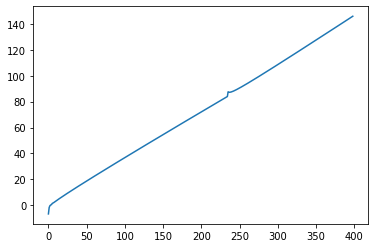

In [ ]:
plt.plot(np.array(logps) - np.array(sas))

In [ ]:
from Levenshtein import distance
from functools import partial
from multiprocessing import Pool

with Pool(30) as pool:
    s = sampled[0]
    res = pool.map(partial(distance, s), tricky_sampler.train_list) 

In [ ]:
def reward_penalized_log_p(mol):
    """
    Reward that consists of log p penalized by SA and # long cycles,
    as described in (Kusner et al. 2017). Scores are normalized based on the
    statistics of 250k_rndm_zinc_drugs_clean.smi dataset
    :param mol: rdkit mol object
    :return: float
    """
    # normalization constants, statistics from 250k_rndm_zinc_drugs_clean.smi
    logP_mean = 2.4570953396190123
    logP_std = 1.434324401111988
    SA_mean = -3.0525811293166134
    SA_std = 0.8335207024513095
    cycle_mean = -0.0485696876403053
    cycle_std = 0.2860212110245455

    log_p = MolLogP(mol)
    SA = -calculateScore(mol)

    # cycle score
    cycle_list = nx.cycle_basis(nx.Graph(
        Chem.rdmolops.GetAdjacencyMatrix(mol)))
    if len(cycle_list) == 0:
        cycle_length = 0
    else:
        cycle_length = max([len(j) for j in cycle_list])
    if cycle_length <= 6:
        cycle_length = 0
    else:
        cycle_length = cycle_length - 6
    cycle_score = -cycle_length

    normalized_log_p = (log_p - logP_mean) / logP_std
    normalized_SA = (SA - SA_mean) / SA_std
    normalized_cycle = (cycle_score - cycle_mean) / cycle_std
    
    return normalized_log_p + normalized_SA + normalized_cycle


import networkx as nx
c81 = Chem.MolFromSmiles('C'*81)
c39 = Chem.MolFromSmiles('C'*39)
print(reward_penalized_log_p(c81))
print(reward_penalized_log_p(c39))

21.66853876944693
11.447566156046966
